In [1]:
import pandas as pd
import numpy as np

from datetime import datetime, date, time, timedelta
import calendar as c         # c is the module
c.setfirstweekday(c.SUNDAY)  # first day Sunday America not Monday Euro
cc = c.Calendar()            # cc is the an instantiation of the class Calendar; class Calendar inside module c

from dateutil.relativedelta import *
from dateutil.rrule import *
from dateutil.parser import *
from dateutil import rrule

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(style='darkgrid')

import copy

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### The intent was to do something cool;  and useful ( or potentially so ) to people with real world responsibility.  After the Broadcastify idea bled to death upon hitting  brick walls,  I wondered what would, say, a district commander might find useful in this crimes dataset.   Lots of various attempts were made to various ranks with personal visits to districts, phone calls and emails but lots got no replies.  Of those that did speak  with me,  I got nowhere or heard a few 'thats above my pay grade'.   I didn't detect any rancor or sharp edges from anyone and was very couteously even friendly treated --- well except for those two district 31 inquiries.   

### So what was self asked was,  if i headed a district, what the heck I might I want to know??  A lot of this project went that way.   A lot of this drive was district oriented.   What a commander might want to tell his shift scheduler,  and then tell his officers going out what to keep a heads up for.

In [2]:
df = pd.read_csv('../data/df_4.csv')

In [3]:
df['date_col'] = pd.to_datetime(df['date_col']) 

#### What officer wouldn't want to know where's it going on?

In [4]:
df['street'] = df['block'].apply(lambda x: ''.join(x.split()[2:]).upper())

#### Overall types citywide

In [5]:
df['primary_type'].value_counts(normalize= True)

THEFT                                0.231976
BATTERY                              0.183482
CRIMINAL DAMAGE                      0.105837
NARCOTICS                            0.073860
ASSAULT                              0.068203
OTHER OFFENSE                        0.063071
DECEPTIVE PRACTICE                   0.062788
BURGLARY                             0.049996
MOTOR VEHICLE THEFT                  0.039243
ROBBERY                              0.038341
CRIMINAL TRESPASS                    0.025578
WEAPONS VIOLATION                    0.015292
OFFENSE INVOLVING CHILDREN           0.008513
PUBLIC PEACE VIOLATION               0.007636
CRIM SEXUAL ASSAULT                  0.005466
INTERFERENCE WITH PUBLIC OFFICER     0.004607
PROSTITUTION                         0.003987
SEX OFFENSE                          0.003837
HOMICIDE                             0.002041
ARSON                                0.001520
LIQUOR LAW VIOLATION                 0.001097
GAMBLING                          

#### Overall the streets with the most events

In [6]:
df['street'].value_counts()[:15]

STATEST                   34252
MICHIGANAVE               33921
HALSTEDST                 24415
ASHLANDAVE                22910
MADISONST                 18906
WESTERNAVE                18754
CLARKST                   18686
DRMARTINLUTHERKINGJRDR    17831
PULASKIRD                 17623
KEDZIEAVE                 15906
NORTHAVE                  15753
CICEROAVE                 13932
CHICAGOAVE                13881
COTTAGEGROVEAVE           13757
WABASHAVE                 13690
Name: street, dtype: int64

#### But where it gets cooler is finding out the deployable district information

In [7]:
df.groupby(['district_name'])['primary_type'].value_counts(normalize= True)

district_name   primary_type                     
Albany Park     THEFT                                0.274669
                BATTERY                              0.162152
                CRIMINAL DAMAGE                      0.128871
                BURGLARY                             0.068335
                DECEPTIVE PRACTICE                   0.064583
                MOTOR VEHICLE THEFT                  0.060795
                OTHER OFFENSE                        0.059890
                ASSAULT                              0.054974
                ROBBERY                              0.035091
                NARCOTICS                            0.029732
                CRIMINAL TRESPASS                    0.018331
                OFFENSE INVOLVING CHILDREN           0.008907
                WEAPONS VIOLATION                    0.007151
                CRIM SEXUAL ASSAULT                  0.005581
                SEX OFFENSE                          0.005581
                PUBL

#### To get some examples

In [8]:
df_11 = df[df['district_name'] == 'Harrison']
df_18 = df[df['district_name'] == 'Near North']
df_07 = df[df['district_name'] == 'Englewood']

In [9]:
df_11['primary_type'].value_counts()[:15]

NARCOTICS                           35302
BATTERY                             26250
THEFT                               14870
CRIMINAL DAMAGE                     10932
ASSAULT                              8827
OTHER OFFENSE                        7204
ROBBERY                              6132
MOTOR VEHICLE THEFT                  4659
DECEPTIVE PRACTICE                   4362
BURGLARY                             3584
PROSTITUTION                         3080
WEAPONS VIOLATION                    2944
CRIMINAL TRESPASS                    2574
PUBLIC PEACE VIOLATION               1307
INTERFERENCE WITH PUBLIC OFFICER     1222
Name: primary_type, dtype: int64

In [10]:
df_11['street'].value_counts()[:15]

MADISONST      7467
PULASKIRD      4853
JACKSONBLVD    4825
MONROEST       4235
LEXINGTONST    3920
CHICAGOAVE     3783
HARRISONST     3694
ROOSEVELTRD    3598
WILCOXST       3569
FLOURNOYST     3495
ADAMSST        3342
POLKST         2996
VANBURENST     2893
MAYPOLEAVE     2789
HOMANAVE       2763
Name: street, dtype: int64

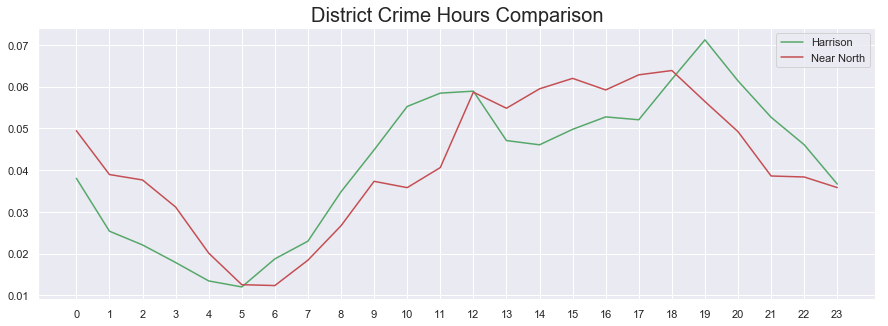

In [11]:
hours_11 = df_11['hour_of_day'].value_counts(normalize= True).sort_index()
hours_18 = df_18['hour_of_day'].value_counts(normalize= True).sort_index()

fig = plt.figure(figsize= (15, 5))
ax = fig.add_subplot(1,1,1)

plt.plot(hours_11.index, list(hours_11), label= 'Harrison', color= 'g')
plt.plot(hours_18.index, list(hours_18), label= 'Near North', color= 'r')

plt.xticks(range(0,24))
ax.set_title('District Crime Hours Comparison', fontsize= 20)
plt.legend()
plt.savefig('../assets/district_11_18_hours.png')

In [12]:
list_11_0 = list(df_11.groupby(['fri_sat_sun'])['hour_of_day'].value_counts(normalize= True)[0].sort_index())
list_11_1 = list(df_11.groupby(['fri_sat_sun'])['hour_of_day'].value_counts(normalize= True)[1].sort_index())

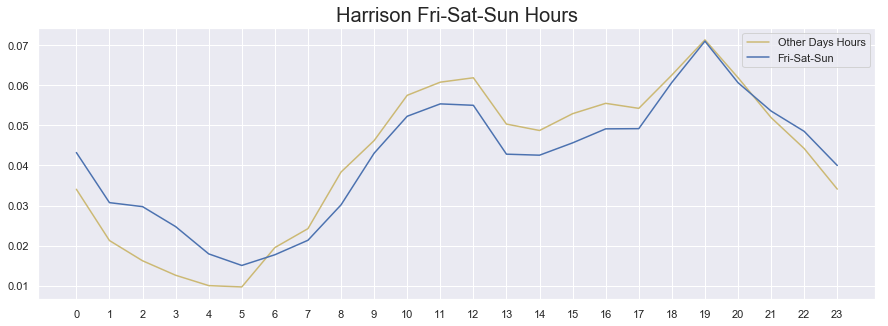

In [13]:

fig = plt.figure(figsize= (15, 5))
ax = fig.add_subplot(1,1,1)

plt.plot(range(24), list_11_0, label= 'Other Days Hours', color= 'y')
plt.plot(range(24), list_11_1, label= 'Fri-Sat-Sun', color= 'b')

plt.xticks(range(0,24))
ax.set_title('Harrison Fri-Sat-Sun Hours', fontsize= 20)
plt.legend()

plt.savefig('../assets/district_11_18_hours.png')

In [14]:
df_11[df_11['primary_type'] == 'NARCOTICS']['street'].value_counts()[:10]

MADISONST         2300
FILLMOREST        1556
LEXINGTONST       1235
PULASKIRD         1205
WILCOXST          1203
MONROEST          1190
SPRINGFIELDAVE    1113
GLADYSAVE         1093
CHICAGOAVE        1041
FLOURNOYST        1029
Name: street, dtype: int64

In [15]:
df_11[df_11['primary_type'] == 'BATTERY']['street'].value_counts()[:10]

MADISONST      1294
JACKSONBLVD    1128
MONROEST        865
PULASKIRD       817
ADAMSST         804
WILCOXST        768
HARRISONST      766
LEXINGTONST     746
POLKST          744
MAYPOLEAVE      697
Name: street, dtype: int64

In [16]:
df_11[df_11['primary_type'] == 'BATTERY']['location_description'].value_counts()[:10]

APARTMENT                        7156
SIDEWALK                         5094
STREET                           4469
RESIDENCE                        3668
RESIDENCE PORCH/HALLWAY           734
SCHOOL, PUBLIC, BUILDING          733
ALLEY                             664
RESIDENTIAL YARD (FRONT/BACK)     488
OTHER                             432
VEHICLE NON-COMMERCIAL            325
Name: location_description, dtype: int64

In [17]:
df_11[df_11['primary_type'] == 'ROBBERY']['street'].value_counts()[:10]

MADISONST       433
PULASKIRD       420
CHICAGOAVE      242
ROOSEVELTRD     229
JACKSONBLVD     215
KEDZIEAVE       211
HARRISONST      205
LAKEST          200
CONGRESSPKWY    147
LEXINGTONST     147
Name: street, dtype: int64

### Predicting precisely where and when the next crime will occur isn't doable,  but as somebody in a district I can use this type of info generated throughout this (hopefully) nonempty exercise and play the odds, shift around resources to deploy (or at least wish what you can shift around perhaps due to institutional constraints)(but like most engineering problems ypu have to figure out what the situation's constraints are),  inform the officers on what shift what to look at for and where.

##### Perhaps something like this.

#### Using the Harrison 11th as an example,  narcotics is the biggest problem.   Hour schedule wise it's steadier than average so we don't get a break to save manpower on certain shifts (example being Central and Near North that has large Deceptive Practice that usually takes Saturday and Sunday off,  and spikes up at whatever shift has the 8 AM and Noon spikes).   This district does have violent crime,  so can tell the officers on the overnight shift that after the evening and early morn rise,  if can get past to 3 AM with no incidents especially homicide then it's probably good news that shift.   Can inform the officers what to expect from because of the spike-y ups and downs depending where in its cycle the Friday-Saturday-Sunday effect is, especially a goose factor it has for violent crimes.   Can tell officers that when watching for narcotics the major 'Presidential' east-west streets are it.   Madison roughly in the middle is the king with Fillmore further south near Roosevelt are big, and somewhat lighter up north where Chicago Ave plays some role.   The big north-south street to watch of consequence is Pulaski with respect to ANYTHING.   With so much Battery taking place inside apartments and houses, it is more dispersed than otherwise, but still so it's the major east-west Presidentials to look out for, with again Pulaski being the north-south street to watch.  Depending where in the cycle the overall yearly by-month supercycle is (the peaks in July troughs in the winter one),  can tell officers if there is any goose up or goose down depending on what time of year it is. Can perhaps try to get more manpower hours in the budget for the Summer July peak.

## Pick up workflow in next notebook.

In [18]:
df.to_csv('../data/df_5.csv', index= False)